In [1]:
import os
import pandas as pd

In [2]:
# 資料視覺化
import matplotlib.pyplot as plt # 基本的繪圖套件
%matplotlib inline
plt.style.use('ggplot') # 製圖時選用ggplot的視覺樣式

In [3]:
from matplotlib.font_manager import FontProperties
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.size'] = 20

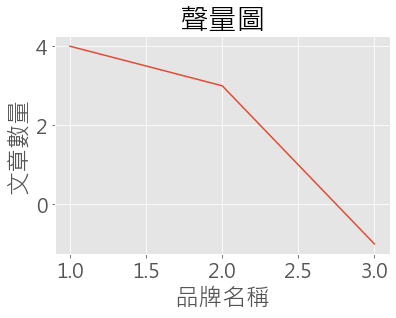

In [4]:
plt.rcParams['font.sans-serif'] = ['Microsoft JhengHei'] 
plt.rcParams['axes.unicode_minus'] = False
plt.plot((1,2,3),(4,3,-1))
plt.title("聲量圖")
plt.ylabel("文章數量")
plt.xlabel("品牌名稱") 
plt.show()

In [5]:
# 歷年資料夾
dirs = [d for d in os.listdir() if d[:4] == 'real']

dfs = []

for d in dirs:
    print(d)
    df = pd.read_csv(os.path.join(d,'a_lvr_land_a.csv'), index_col=False)
    df['Q'] = d[-1]
    dfs.append(df.iloc[1:])
    
df = pd.concat(dfs, sort=True)

real_estate1061
real_estate1032
real_estate1051
real_estate1033
real_estate1034
real_estate1042
real_estate1074
real_estate1073
real_estate1021
real_estate1072
real_estate1081
real_estate1043
real_estate1044
real_estate1031
real_estate1062
real_estate1091
real_estate1053
real_estate1054
real_estate1052
real_estate1064
real_estate1063
real_estate1041
real_estate1084
real_estate1083
real_estate1023
real_estate1024
real_estate1082
real_estate1071
real_estate1014
real_estate1022


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 177579 entries, 1 to 7378
Data columns (total 29 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   Q             177579 non-null  object
 1   主要建材          157975 non-null  object
 2   主要用途          153080 non-null  object
 3   交易年月日         177579 non-null  object
 4   交易標的          177579 non-null  object
 5   交易筆棟數         177579 non-null  object
 6   備註            70900 non-null   object
 7   單價元平方公尺       167907 non-null  object
 8   土地區段位置建物區段門牌  177579 non-null  object
 9   土地移轉總面積平方公尺   177579 non-null  object
 10  建物型態          177579 non-null  object
 11  建物現況格局-廳      177579 non-null  object
 12  建物現況格局-房      177579 non-null  object
 13  建物現況格局-衛      177579 non-null  object
 14  建物現況格局-隔間     177579 non-null  object
 15  建物移轉總面積平方公尺   177579 non-null  object
 16  建築完成年月        140627 non-null  object
 17  有無管理組織        177579 non-null  object
 18  移轉層次          157775 non-n

In [7]:
# 觀察哪些資料有缺失值
all_data_isnull = df.isnull().sum() # 觀察哪些資料有缺失值
all_data_isnull[all_data_isnull>0].sort_values(ascending=False)

非都市土地使用編定    177579
非都市土地使用分區    177553
車位類別         116971
備註           106679
建築完成年月        36952
主要用途          24499
總樓層數          19967
移轉層次          19804
主要建材          19604
單價元平方公尺        9672
都市土地使用分區       1640
dtype: int64

In [8]:
df.columns

Index(['Q', '主要建材', '主要用途', '交易年月日', '交易標的', '交易筆棟數', '備註', '單價元平方公尺',
       '土地區段位置建物區段門牌', '土地移轉總面積平方公尺', '建物型態', '建物現況格局-廳', '建物現況格局-房',
       '建物現況格局-衛', '建物現況格局-隔間', '建物移轉總面積平方公尺', '建築完成年月', '有無管理組織', '移轉層次',
       '編號', '總價元', '總樓層數', '車位移轉總面積平方公尺', '車位總價元', '車位類別', '都市土地使用分區', '鄉鎮市區',
       '非都市土地使用分區', '非都市土地使用編定'],
      dtype='object')

## 一、資料前處理

### 1. 日期處理

In [9]:
# 新增交易年份
df['year'] = df['交易年月日'].str[:-4].astype(int) + 1911

# 將index改成年月日
df.index = pd.to_datetime((df['交易年月日'].str[:-4].astype(int) + 1911).astype(str) + df['交易年月日'].str[-4:] ,errors='coerce')

### 2. 資料轉換

In [ ]:
df['單價元平方公尺'] = df['單價元平方公尺'].astype(float).round()
df['建物移轉總面積平方公尺'] = df['建物移轉總面積平方公尺'].astype(float).round()

df['單價元坪'] = df['單價元平方公尺'] * 0.3025

### 3. 欄位整理

In [ ]:
# 建物型態
df['建物型態(N)'] = df['建物型態'].str.split('(').str[0]

# 交易標的
df['交易標的(N)'] = df['交易標的'].str.split('(').str[0]

# 選取有價格的房子
df = df[df['單價元平方公尺'].notnull()]

# 選取有層數的房子
df = df[df['總樓層數'].notnull()]

# 選取有移轉層次的房子
df = df[df['移轉層次'].notnull()]

# 刪除有備註之交易（多為親友交易、價格不正常之交易）
df = df[df['備註'].isnull()]

# 刪除欄位
df = df.drop(['交易年月日','編號','非都市土地使用分區','非都市土地使用編定','備註','建物型態','交易標的'],axis=1)

### 4. 資料欄位轉換

In [ ]:
df['建物現況格局-廳'] = df['建物現況格局-廳'].astype(int)
df['建物現況格局-房'] = df['建物現況格局-房'].astype(int)
df['建物現況格局-衛'] = df['建物現況格局-衛'].astype(int)
df['建築完成年月'] = df['建物現況格局-衛'].astype(int)
df['建物移轉總面積平方公尺'] = df['建物移轉總面積平方公尺'].astype(float)

## 二、特徵抽取

In [ ]:
df.shape

In [ ]:
df.columns

In [ ]:
all_data_isnull = df.isnull().sum() # 觀察哪些資料有缺失值
select_isnull = all_data_isnull[all_data_isnull>0].sort_values(ascending=False)
print(select_isnull)

In [ ]:
# 選取有主要用途的房子
df = df[df['主要用途'].notnull()]

# 選取有主要建材的房子
df = df[df['主要建材'].notnull()]

# 選取有都市土地使用分區的房子
df = df[df['都市土地使用分區'].notnull()]

In [ ]:
col_1 = ['車位類別']

for col in col_1:
    df[col].fillna("未標注", inplace=True) 

In [ ]:
df = df.drop('Q',axis=1)

In [ ]:
df.shape

In [ ]:
df.to_csv('RealEstate_Location_109_1.csv')

In [ ]:
aaaaa

In [ ]:
select_isnull.keys()

In [ ]:
# 檢視各欄位類別不同種類

b = df.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)
b[select_isnull.keys()]

In [ ]:
df['都市土地使用分區'].unique()

In [ ]:
df['車位類別'].unique()

In [ ]:
df['主要用途'].unique()

In [ ]:
df['主要建材'].unique()

In [ ]:
import seaborn as sns # 基於matplotlib提供更多高階視覺化的套件
plt.rcParams['font.size'] = 9

In [ ]:
df[['主要建材','Q']].groupby('主要建材').count().sort_values(by ='Q', ascending = False)

In [ ]:
df[['主要用途','Q']].groupby('主要用途').count().sort_values(by ='Q', ascending = False)

In [ ]:
df[['車位類別','Q']].groupby('車位類別').count().sort_values(by ='Q', ascending = False)

In [ ]:
plt.figure(figsize=(15, 10))
sns.countplot(df['主要建材'])
plt.show()

### 缺失欄位補值

In [ ]:
col_2 = ['主要用途']

for col in col_2:
    df[col].fillna("住家用", inplace=True)

In [ ]:
col_3 = ['都市土地使用分區']

for col in col_3:
    df[col].fillna("其他", inplace=True) 

In [ ]:
col_4 = ['主要建材']

for col in col_4:
    df[col].fillna("鋼筋混凝土造", inplace=True) 

In [ ]:
all_data_isnull = df.isnull().sum() # 觀察哪些資料有缺失值
select_isnull = all_data_isnull[all_data_isnull>0].sort_values(ascending=False)
print(select_isnull)

In [ ]:
df.shape

In [ ]:
df.head()

In [ ]:
df = df.drop('Q',axis=1)

In [ ]:
df.columns

In [ ]:
df.to_csv('Clean_real_estate.csv')

### 三、特徵轉換

In [ ]:
df1['建物現況格局-隔間'].unique()

In [ ]:
bay_mapping = {'有':0,'無':'1'}

for dataset in data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [ ]:
df1.isnull().sum()

In [ ]:
df1.select_dtypes(include=["object"]).apply(pd.Series.nunique, axis = 0)

In [ ]:
prices = {}
for district in set(df['鄉鎮市區']):
    cond = (
        (df['主要用途'] == '住家用')
        & (df['鄉鎮市區'] == district)
        & (df['單價元坪'] < df["單價元坪"].quantile(0.95))
        & (df['單價元坪'] > df["單價元坪"].quantile(0.05))
        )
    
    groups = df[cond]['year']
    
    prices[district] = df[cond]['單價元坪'].astype(float).groupby(groups).mean().loc[2012:]
    
price_history = pd.DataFrame(prices)
price_history.plot(figsize=(20,10))

In [ ]:
price_history.mean(axis=1).plot(figsize=(20,10))

In [ ]:
building_type_prices = {}
for building_type in set(df['建物型態2']):
    cond = (
        (df['主要用途'] == '住家用')
        & (df['單價元坪'] < df["單價元坪"].quantile(0.8))
        & (df['單價元坪'] > df["單價元坪"].quantile(0.2))
        & (df['建物型態2'] == building_type)
        )
    building_type_prices[building_type] = df[cond]['單價元坪'].groupby(df[cond]['year']).mean().loc[2012:]
pd.DataFrame(building_type_prices)[['公寓', '住宅大樓', '套房', '華廈']].plot(figsize=(20,10))

In [ ]:
for district in set(df['鄉鎮市區']):
    dfdistrict = df[df['鄉鎮市區'] == district]
    dfdistrict['單價元坪'][dfdistrict['單價元坪'] < 2000000].hist(bins=120, alpha=0.7)

plt.xlim(0, 2000000)
plt.legend(set(df['鄉鎮市區']))

In [ ]:
dfdistrict = df[(df['鄉鎮市區'] == '北投區') & (df['year'] >= 2018) & (
    (df['建物型態2'] == '住宅大樓') | (df['建物型態2'] == '公寓') | (df['建物型態2'] == '套房')
)]
dfdistrict = dfdistrict[dfdistrict['單價元坪'] < 2000000]

dfdistrict['單價元坪'].groupby(dfdistrict['建物型態2']).hist(bins=50, alpha=0.7)
plt.legend(set(dfdistrict['建物型態2']))

In [ ]:
df.to_csv('rs.csv')